# Chapter 7. Annotations

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## 7.1 Adding Text Annotations

> If the axes are continuous, you can use the special values `Inf` and `-Inf` to place text annotations at the edge of the plotting area.

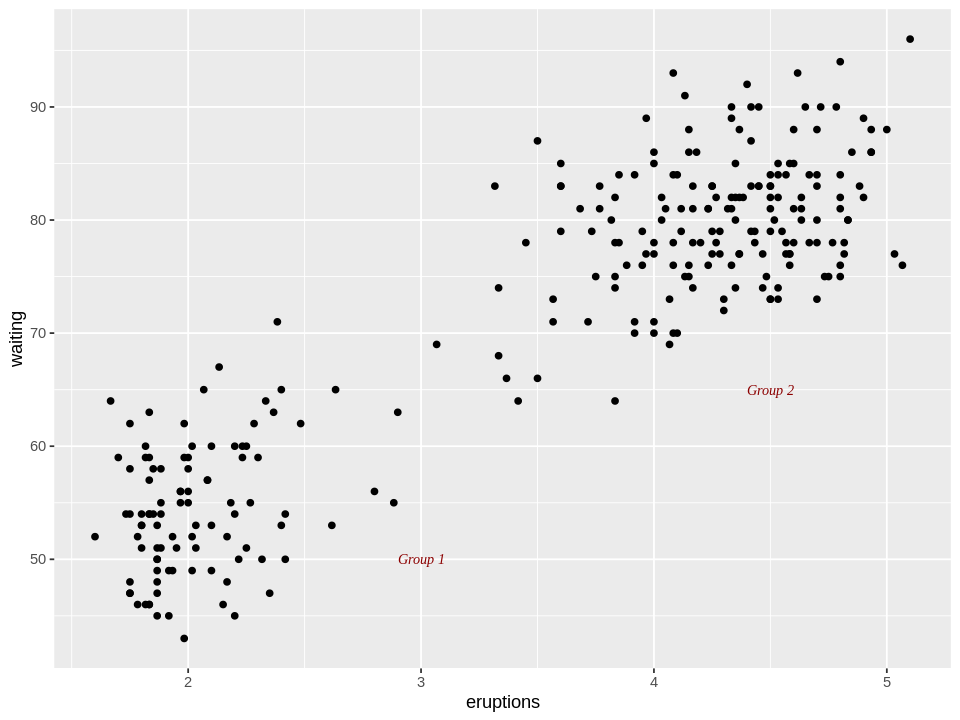

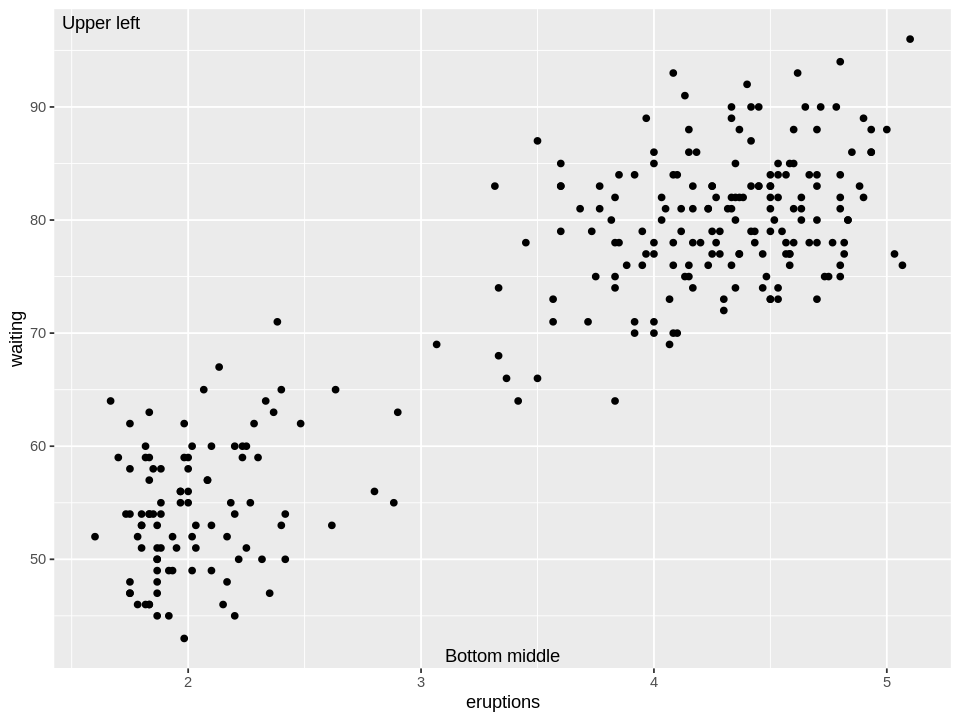

In [2]:
annotate.args <- list(geom = "text", colour = "darkred", family = "serif", fontface = "italic", size = 3)

qplot(eruptions, waiting, data = faithful) +
  do.call(annotate, c(annotate.args, list(label = "Group 1", x = 3, y = 50))) +
  do.call(annotate, c(annotate.args, list(label = "Group 2", x = 4.5, y = 65)))

qplot(eruptions, waiting, data = faithful) +
  annotate("text", hjust = -.1, label = "Upper left", vjust = 1.5, x = -Inf, y = Inf) +
  annotate("text", label = "Bottom middle", vjust = -.5, x = mean(range(faithful$eruptions)), y = -Inf)

## 7.2 Using Mathematical Expressions in Annotations

> Mathematical expressions made with text geoms using `parse = TRUE` in **ggplot2** have a format similar to those made with `plotmath` and `expression` in base R, except that they are stored as strings, rather than as expression objects.

> To mix regular text with expressions, use single quotes within double quotes (or vice versa) to mark the plain-text parts. Each block of text enclosed by the inner quotes is treated as a variable in a mathematical expression. To display two variables next to each other put a `*` operator between them; when displayed in a graphic, this is treated as an invisible multiplication sign (for a visible multiplication sign, use `%*%`).

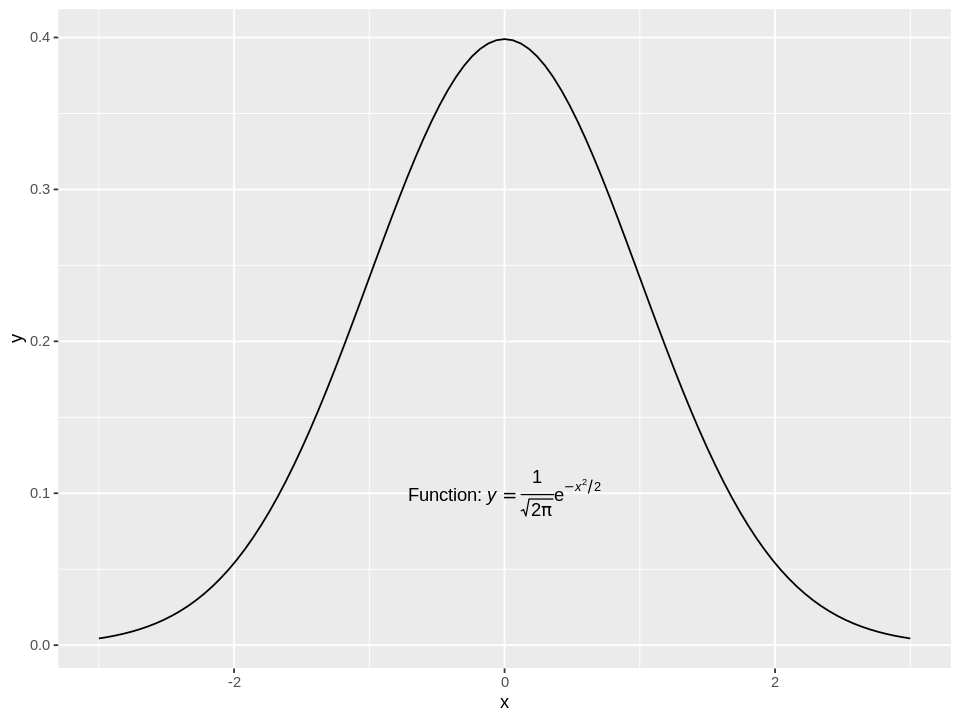

In [3]:
ggplot(tibble(x = c(-3, 3)), aes(x)) +
  stat_function(fun = dnorm) +
  annotate("text", label = "'Function: ' * italic(y) == frac(1, sqrt(2 * pi)) * e^{ -italic(x)^2 / 2 }", parse = TRUE, x = 0, y = .1)



	demo(plotmath)
	---- ~~~~~~~~

> #  Copyright (C) 2002-2016 The R Core Team
> 
> require(datasets)

> require(grDevices); require(graphics)

> ## --- "math annotation" in plots :
> 
> ######
> # create tables of mathematical annotation functionality
> ######
> make.table <- function(nr, nc) {
+     savepar <- par(mar=rep(0, 4), pty="s")
+     plot(c(0, nc*2 + 1), c(0, -(nr + 1)),
+          type="n", xlab="", ylab="", axes=FALSE)
+     savepar
+ }

> get.r <- function(i, nr) {
+     i %% nr + 1
+ }

> get.c <- function(i, nr) {
+     i %/% nr + 1
+ }

> draw.title.cell <- function(title, i, nr) {
+     r <- get.r(i, nr)
+     c <- get.c(i, nr)
+     text(2*c - .5, -r, title)
+     rect((2*(c - 1) + .5), -(r - .5), (2*c + .5), -(r + .5))
+ }

> draw.plotmath.cell <- function(expr, i, nr, string = NULL) {
+     r <- get.r(i, nr)
+     c <- get.c(i, nr)
+     if (is.null(string)) {
+         string <- deparse(expr)
+         string <- substr(string, 12, nchar(string) - 1)
+     }
+    

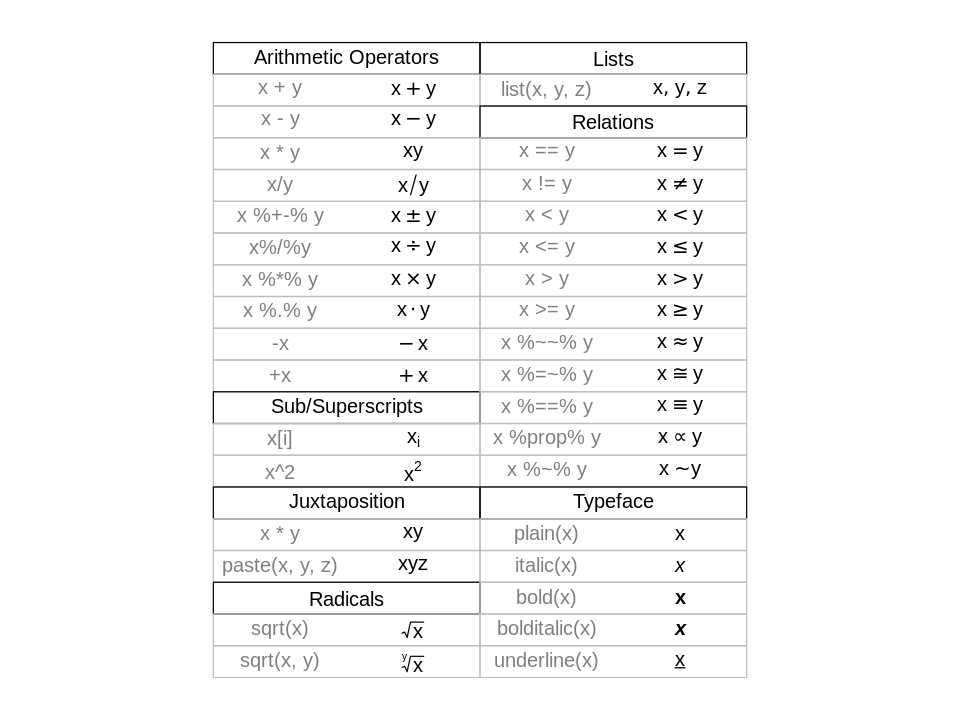

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Ellipsis", i, nr); i <- i + 1

> draw.plotmath.cell(expression(list(x[1], ..., x[n])), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x[1] + ... + x[n]), i, nr); i <- i + 1

> draw.plotmath.cell(expression(list(x[1], cdots, x[n])), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x[1] + ldots + x[n]), i, nr); i <- i + 1

> draw.title.cell("Set Relations", i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %subset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %subseteq% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %supset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %supseteq% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %notsubset% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %in% y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x %notin% y), i, nr); i <- i + 1

> draw.title.cell("Accents", i, nr); i <- i + 1

> draw.plotmath.cell(expression(

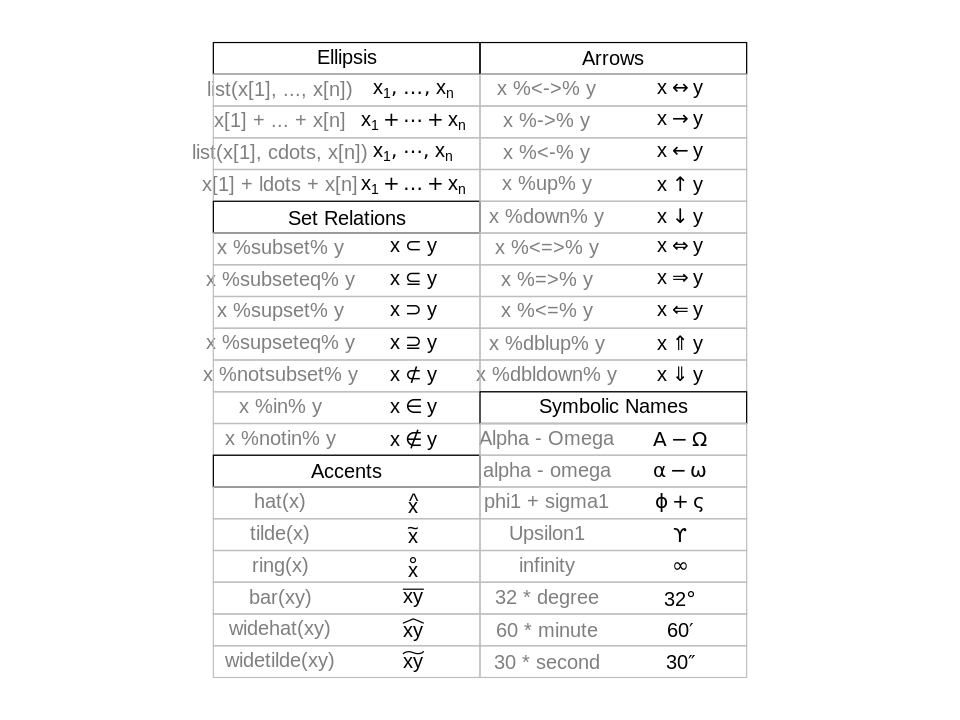

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 4

> draw.plotmath.cell(expression(x + phantom(0) + y), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x + over(1, phantom(0))), i, nr); i <- i + 1

> draw.title.cell("Fractions", i, nr); i <- i + 1

> draw.plotmath.cell(expression(frac(x, y)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(over(x, y)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(atop(x, y)), i, nr); i <- i + 1

> # Need fewer, taller rows and fewer, wider columns for big operators ...
> nr <- 10

> nc <- 1

> make.table(nr, nc)


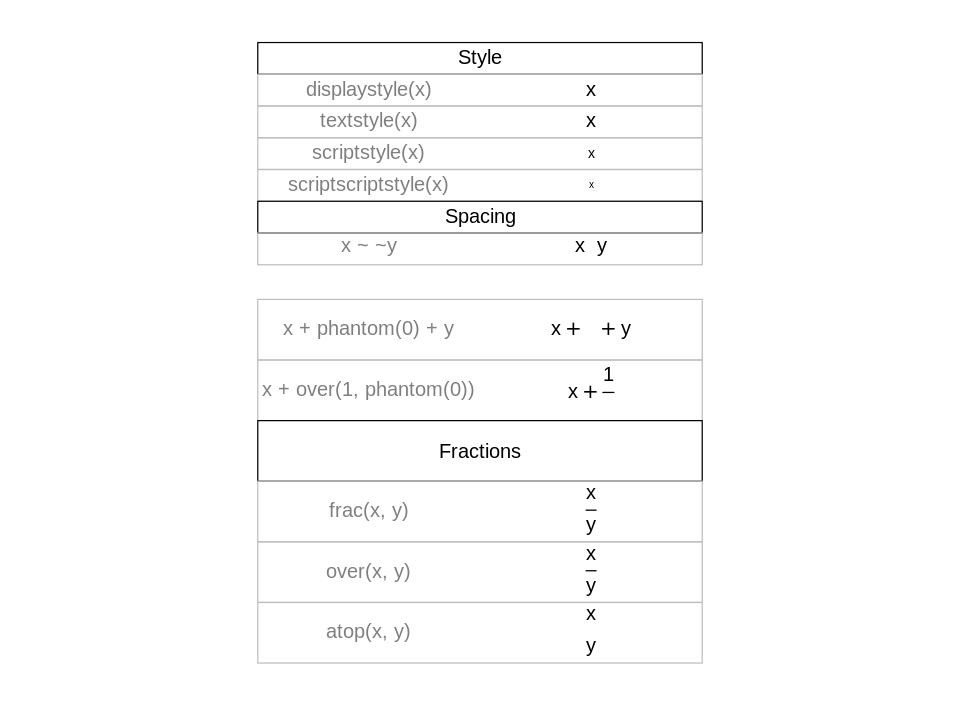

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Big Operators", i, nr); i <- i + 1

> draw.plotmath.cell(expression(sum(x[i], i=1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(prod(plain(P)(X == x), x)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(integral(f(x) * dx, a, b)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(union(A[i], i==1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(intersect(A[i], i==1, n)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(lim(f(x), x %->% 0)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(min(g(x), x >= 0)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(inf(S)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(sup(S)), i, nr); i <- i + 1

> nr <- 11

> make.table(nr, nc)


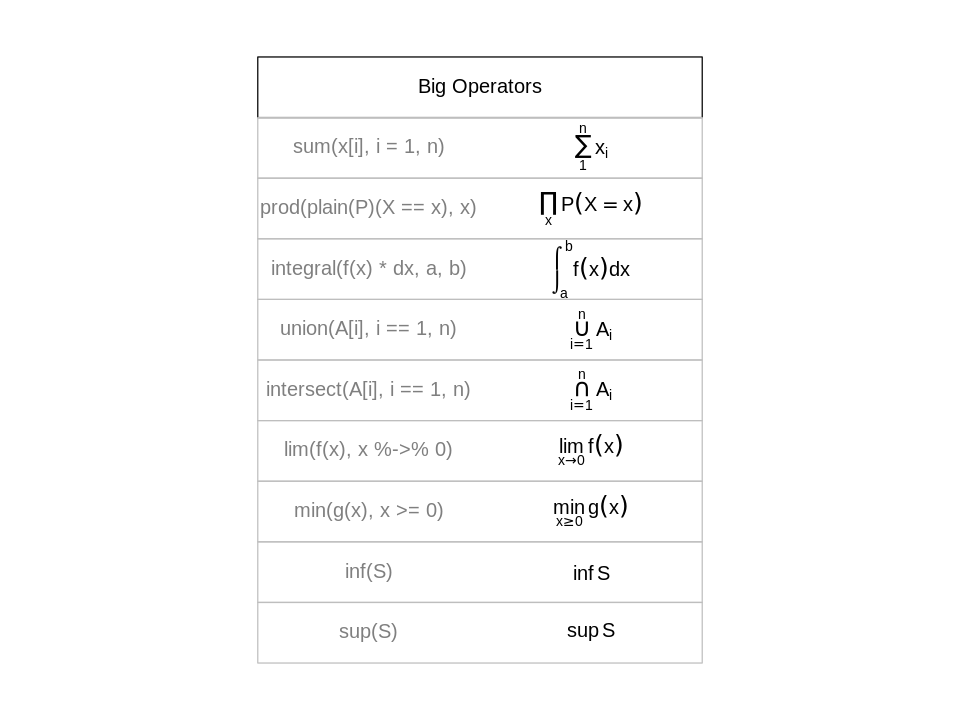

$mar
[1] 0 0 0 0

$pty
[1] "s"


> i <- 0

> draw.title.cell("Grouping", i, nr); i <- i + 1

> # Those involving '{ . }' have to be done "by hand"
> draw.plotmath.cell(expression({}(x , y)), i, nr, string="{}(x, y)"); i <- i + 1

> draw.plotmath.cell(expression((x + y)*z), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^y + z),   i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^(y + z)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(x^{y + z}), i, nr, string="x^{y + z}"); i <- i + 1

> draw.plotmath.cell(expression(group("(", list(a, b), "]")), i, nr); i <- i + 1

> draw.plotmath.cell(expression(bgroup("(", atop(x, y), ")")), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group(lceil, x, rceil)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group(lfloor, x, rfloor)), i, nr); i <- i + 1

> draw.plotmath.cell(expression(group("|", x, "|")), i, nr); i <- i + 1

> par(oldpar)


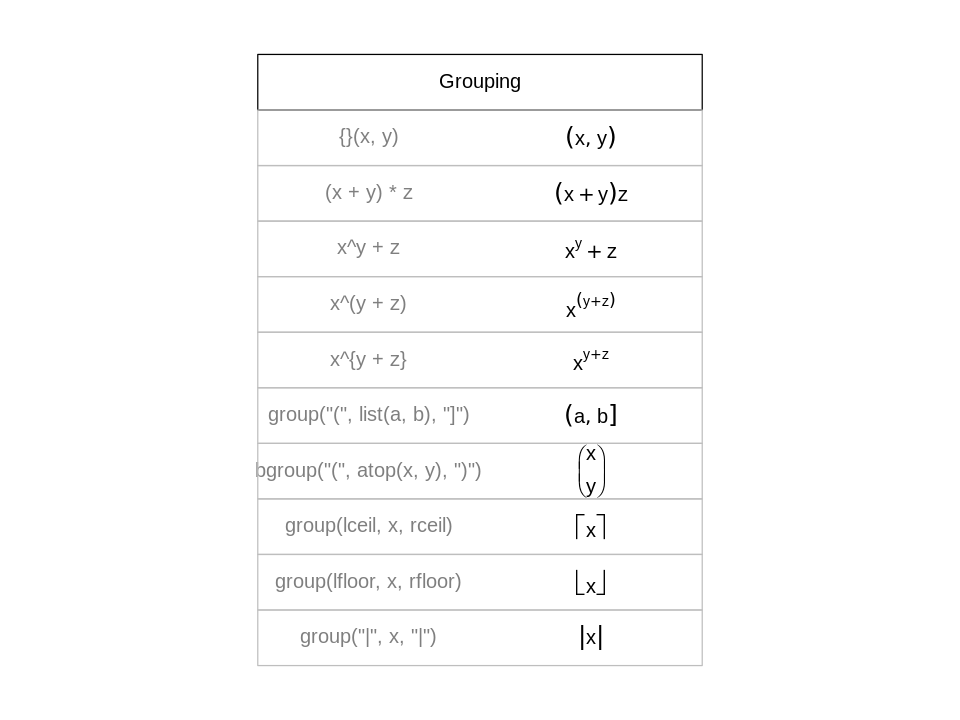

In [4]:
demo(plotmath)

## 7.3 Adding Lines


Call:
lm(formula = heightIn ~ ageYear, data = gcookbook::heightweight)

Coefficients:
(Intercept)      ageYear  
     37.436        1.748  


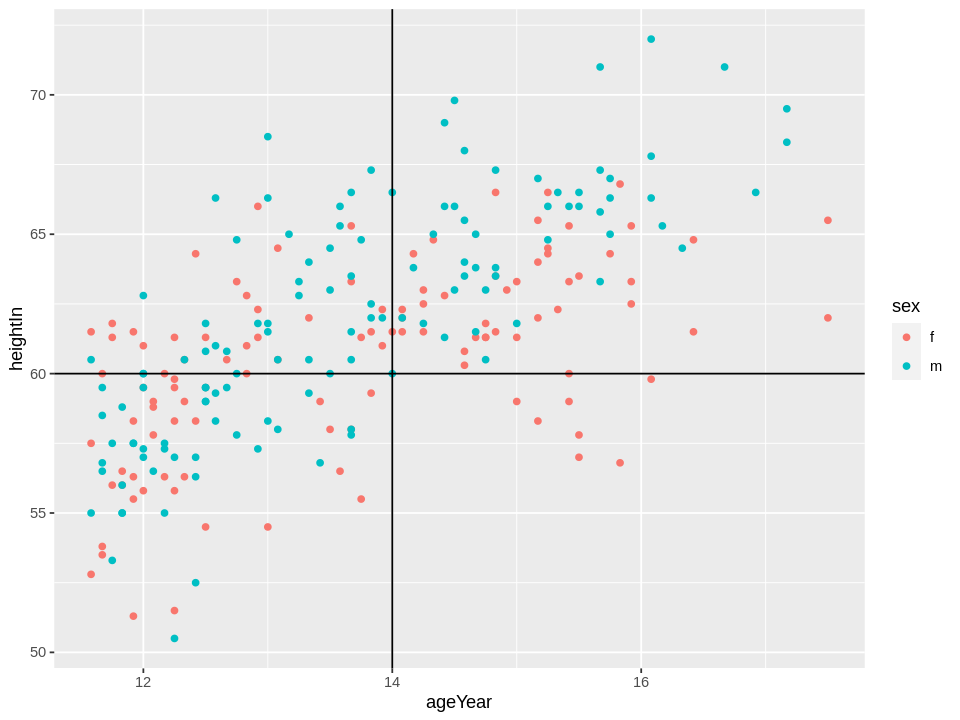

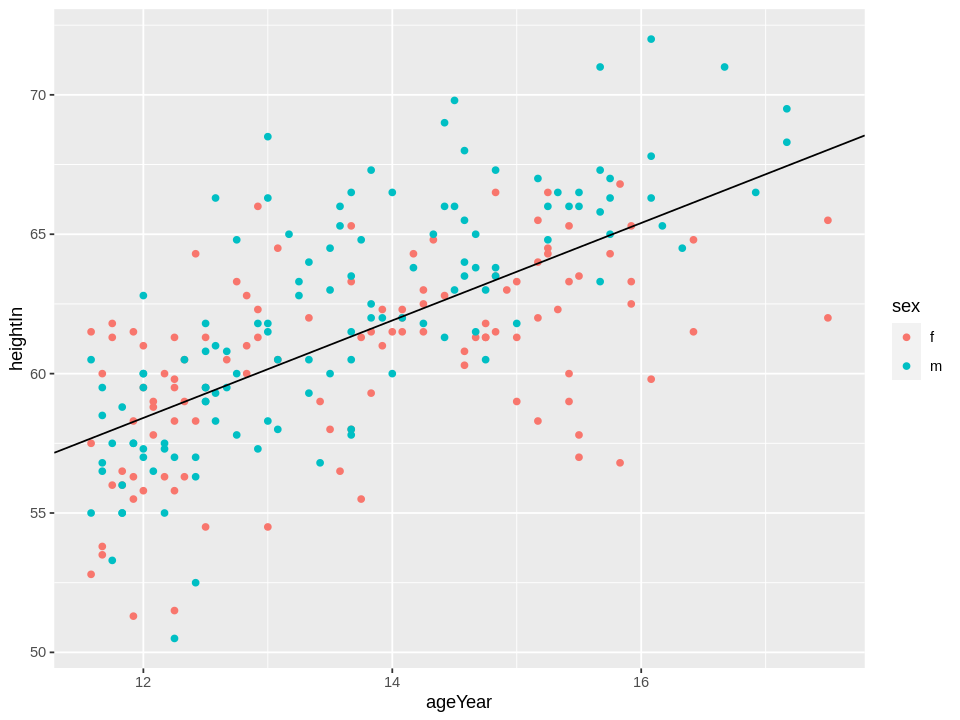

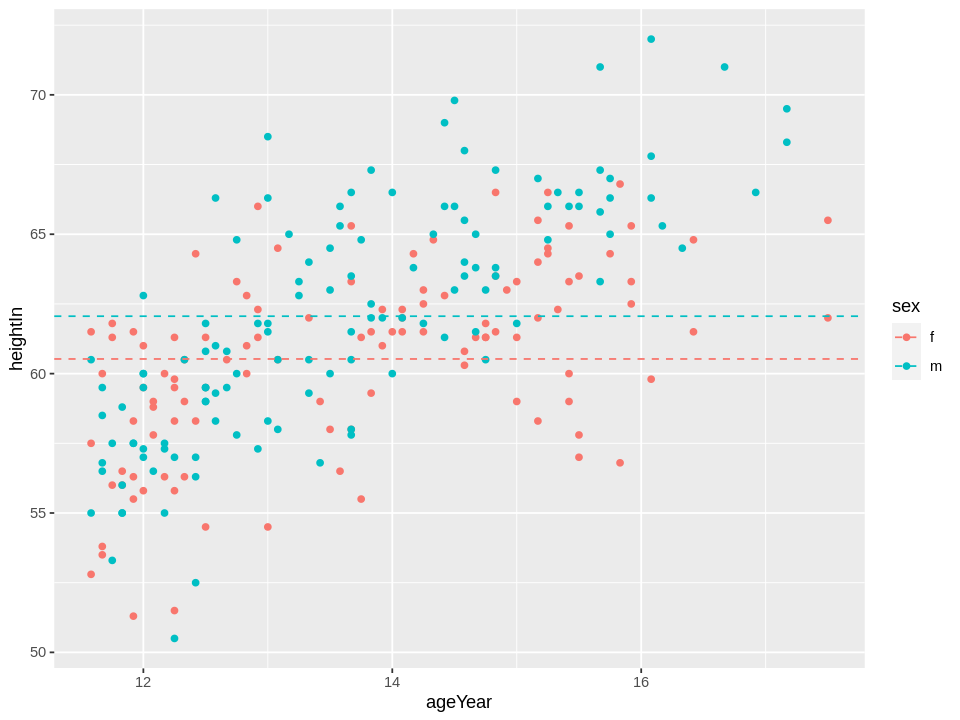

In [5]:
qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  geom_vline(xintercept = 14) +
  geom_hline(yintercept = 60)

lm(heightIn ~ ageYear, gcookbook::heightweight)

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  geom_abline(intercept = 37.436, slope = 1.748)

qplot(ageYear, heightIn, color = sex, data = gcookbook::heightweight) +
  geom_hline(
    aes(yintercept = heightIn, color = sex),
    summarise(group_by(gcookbook::heightweight, sex), heightIn = mean(heightIn), .groups = "drop"),
    linetype = "dashed"
  )

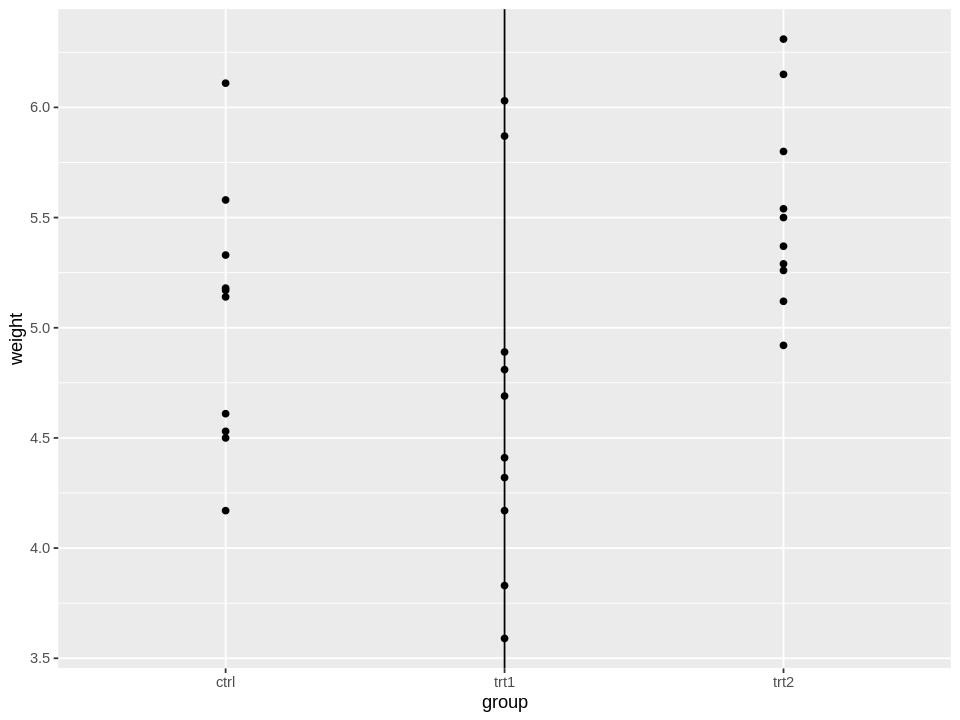

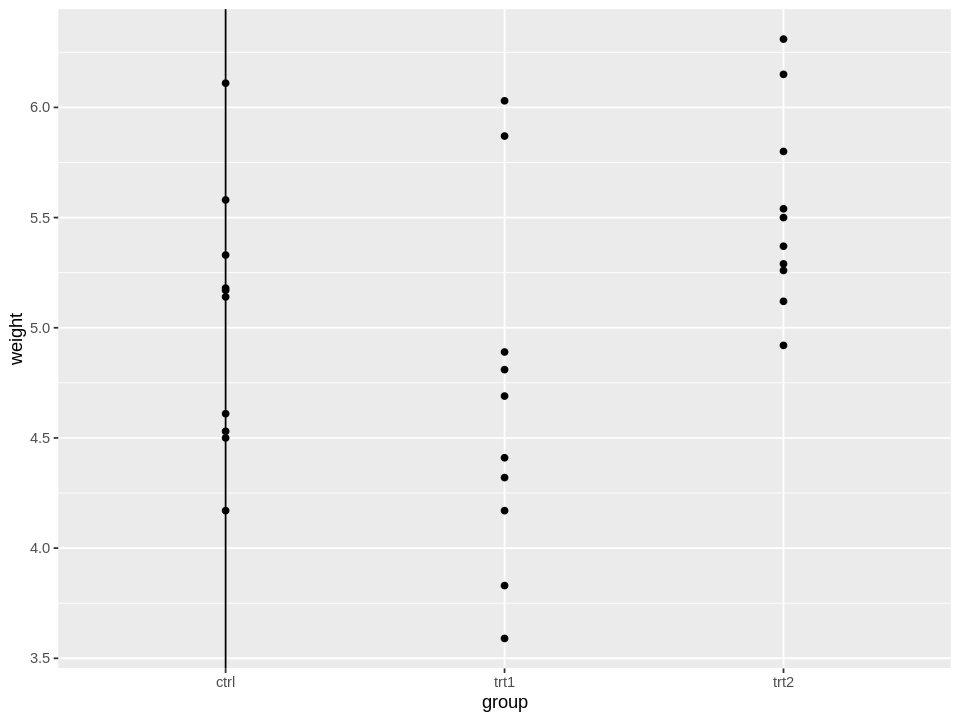

In [6]:
qplot(group, weight, data = PlantGrowth) +
  geom_vline(xintercept = 2)

qplot(group, weight, data = PlantGrowth) +
  geom_vline(xintercept = which(levels(PlantGrowth$group) == "ctrl"))

## 7.4 Adding Line Segments and Arrows

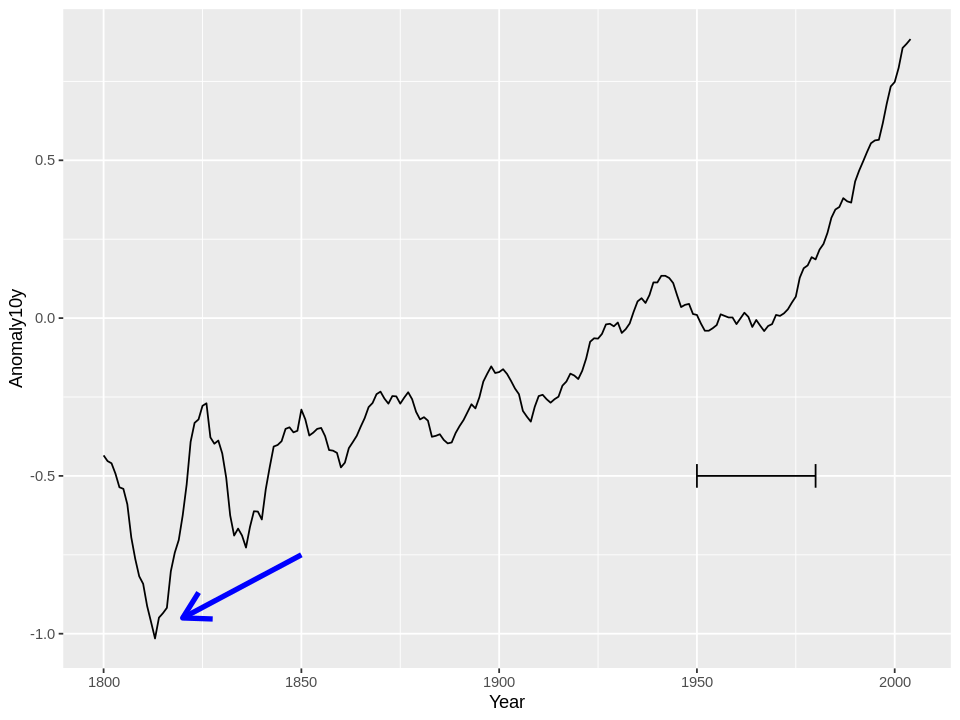

In [7]:
filter(gcookbook::climate, Source == "Berkeley") %>%
  ggplot(aes(Year, Anomaly10y)) +
  geom_line() +
  annotate(
    "segment",
    arrow = arrow(angle = 90, ends = "both", length = unit(.25, "cm")),
    x = 1950,
    xend = 1980,
    y = -.5,
    yend = -.5
  ) +
  annotate(
    "segment",
    arrow = arrow(),
    color = "blue", size = 1.5,
    x = 1850,
    xend = 1820,
    y = -.75,
    yend = -.95
  )

## 7.5 Adding a Shaded Rectangle

> Any geom can be used with `annotate()`, as long as you pass in the proper parameters. In this case, `geom_rect()` requires min and max values for `x` and `y`.

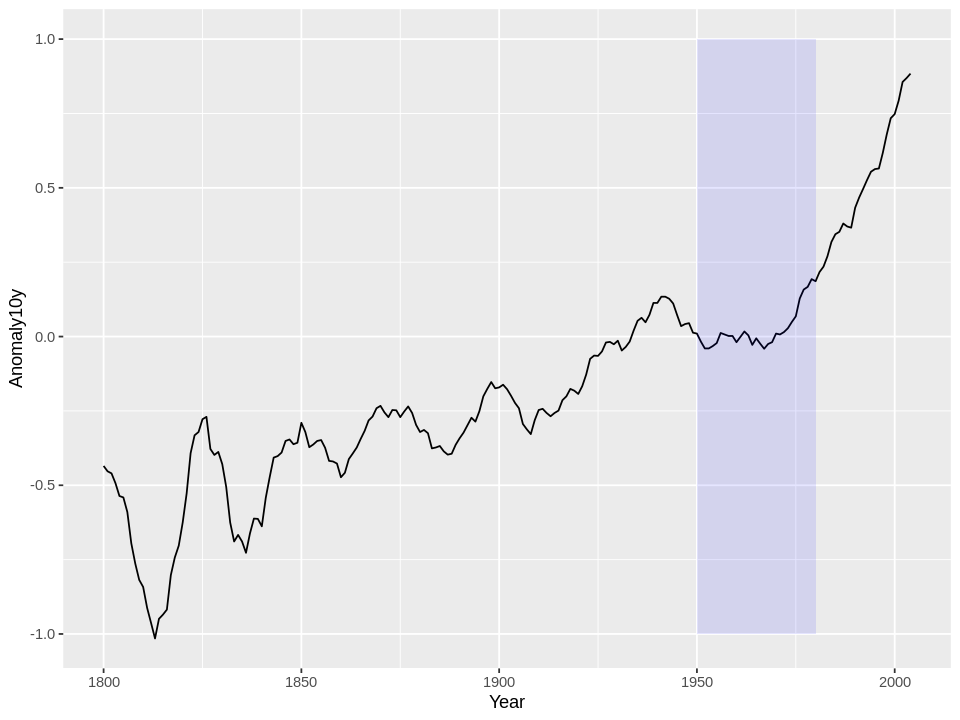

In [8]:
filter(gcookbook::climate, Source == "Berkeley") %>%
  ggplot(aes(Year, Anomaly10y)) +
  geom_line() +
  annotate(
    "rect",
    alpha = .1,
    fill = "blue",
    xmax = 1980,
    xmin = 1950,
    ymax = 1,
    ymin = -1,
  )

## 7.6 Highlighting an Item

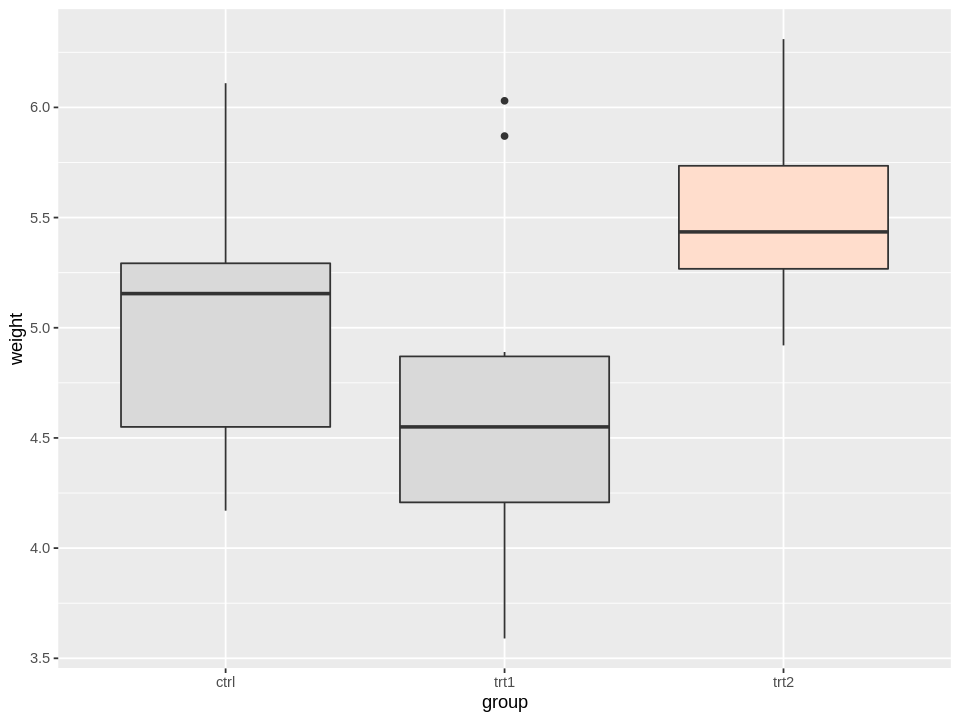

In [9]:
ggplot(PlantGrowth, aes(group, weight, fill = group == "trt2")) +
  geom_boxplot() +
  scale_fill_manual(guide = FALSE, values = c("grey85", "#ffddcc"))

## 7.7 Adding Error Bars

> In this example, the data already has values for the standard error of the mean (`se`), which we’ll use for the error bars (it also has values for the standard deviation, `sd`, but we’re not using that here).

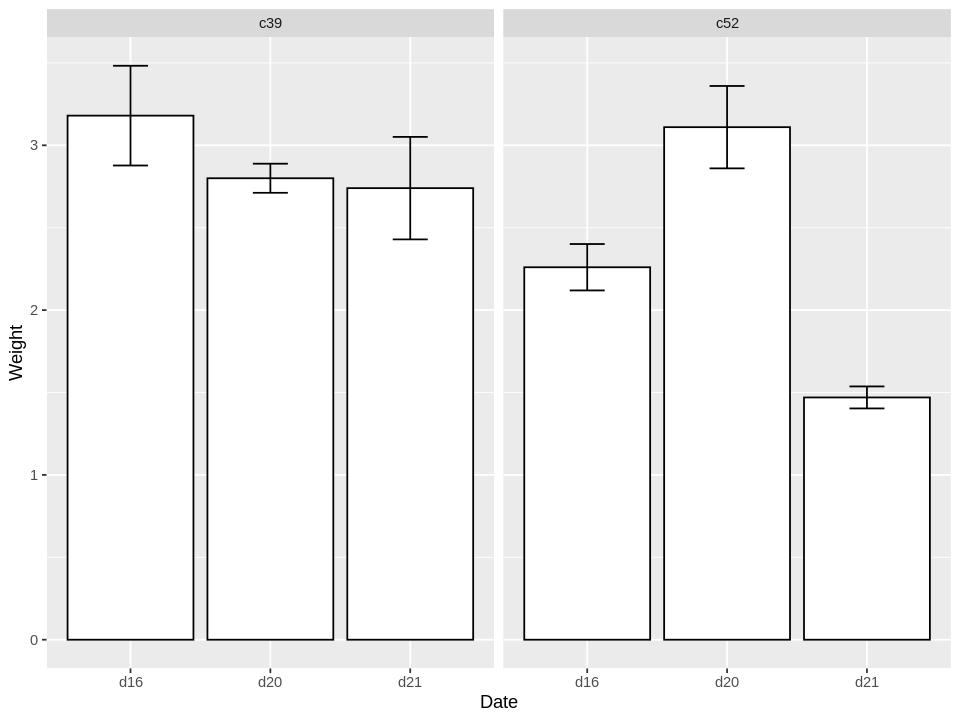

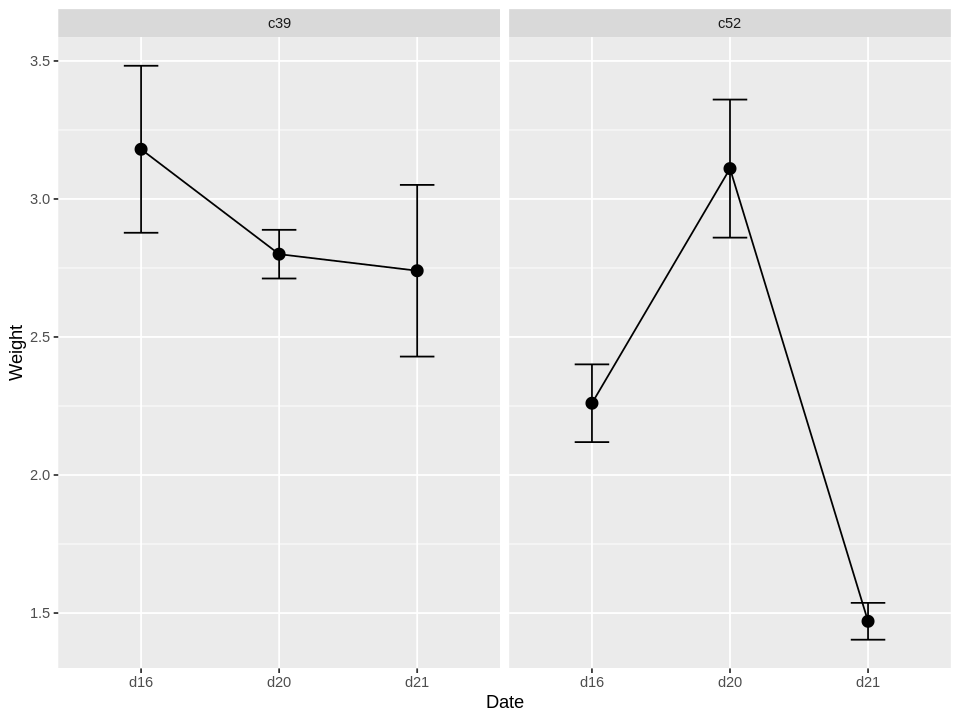

In [10]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight)) +
  geom_col(color = "black", fill = "white") +
  geom_errorbar(aes(ymax = Weight + se, ymin = Weight - se), width = .25) +
  facet_wrap(~Cultivar)

ggplot(gcookbook::cabbage_exp, aes(Date, Weight)) +
  geom_line(group = 1) +
  geom_point(size = 3) +
  geom_errorbar(aes(ymax = Weight + se, ymin = Weight - se), width = .25) +
  facet_wrap(~Cultivar)

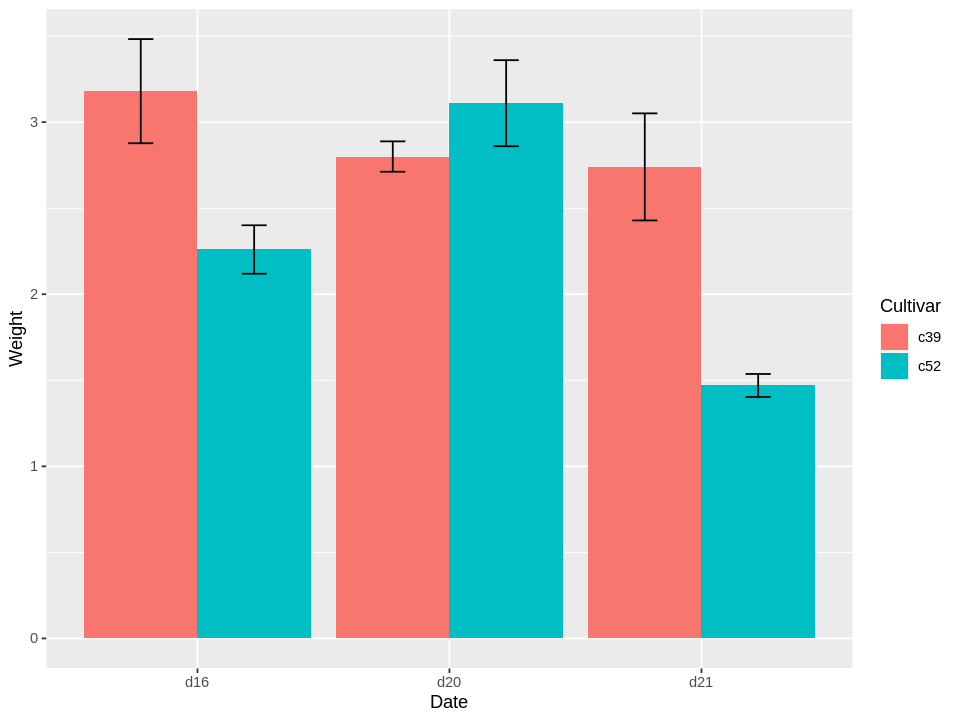

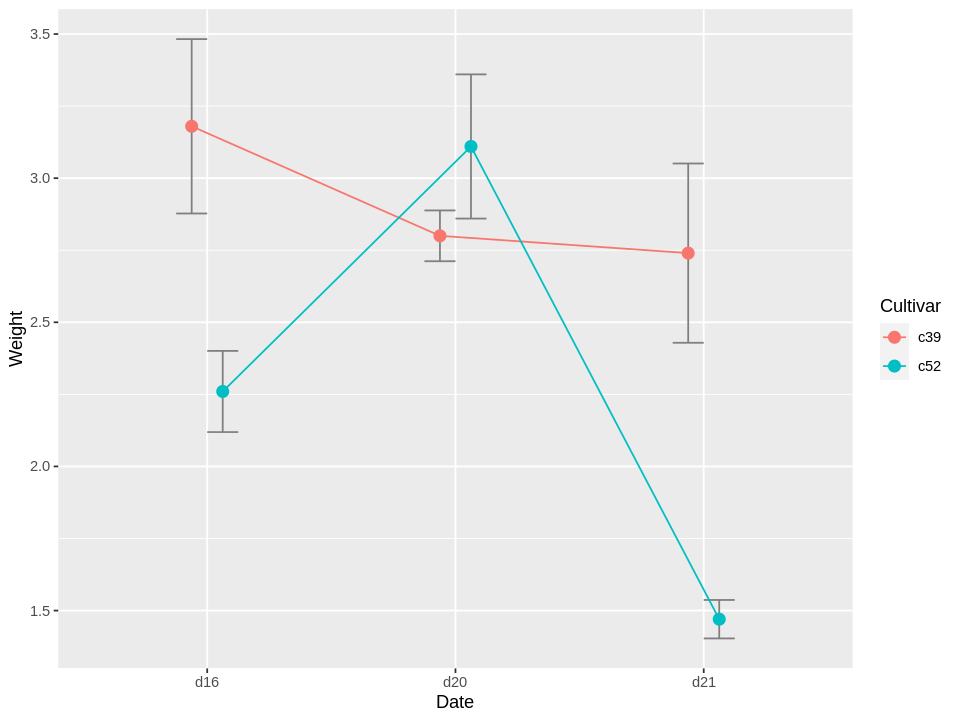

In [11]:
ggplot(gcookbook::cabbage_exp, aes(Date, Weight)) +
  geom_col(aes(fill = Cultivar), position = "dodge") +
  geom_errorbar(
    aes(group = Cultivar, ymax = Weight + se, ymin = Weight - se),
    position = position_dodge(.9),
    width = .2
  )

ggplot(gcookbook::cabbage_exp, aes(Date, Weight, color = Cultivar, group = Cultivar)) +
  geom_errorbar(
    aes(ymax = Weight + se, ymin = Weight - se),
    color = "grey50",
    position = position_dodge(.25),
    width = .25
  ) +
  geom_line(position = position_dodge(.25)) +
  geom_point(position = position_dodge(.25), size = 3)

## 7.8 Adding Annotations to Individual Facets

[1] "4" "f" "r"

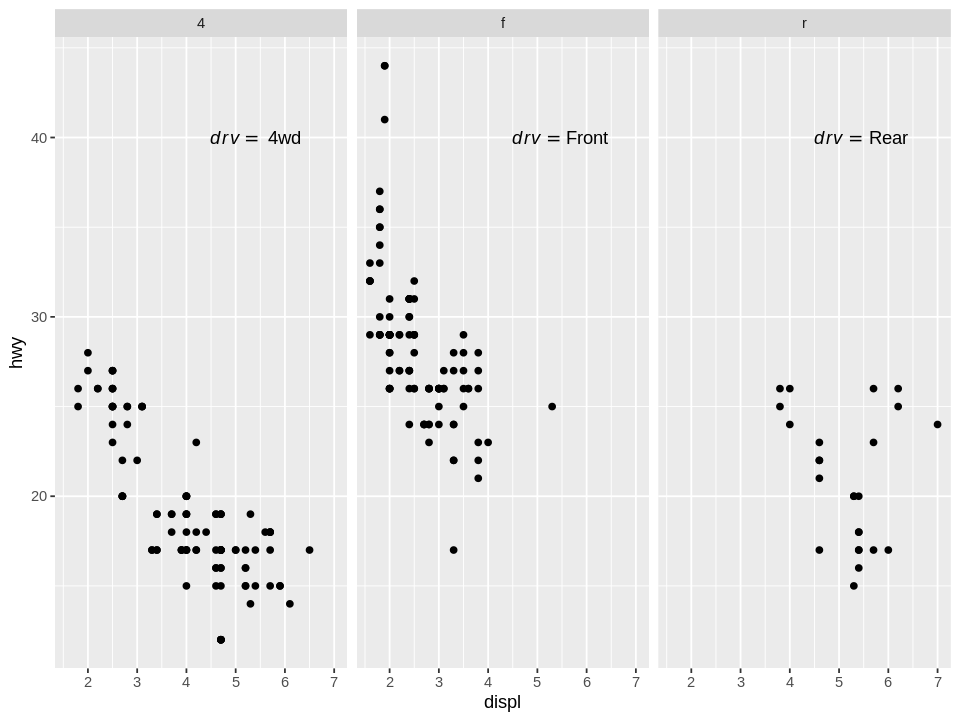

In [12]:
levels(factor(mpg$drv))

ggplot(mpg, aes(displ, hwy)) +
  geom_point() +
  geom_text(
    aes(label = label, x = 6, y = 40),
    tibble(
      drv = c("4", "f", "r"),
      label = c("4wd", "Front", "Rear")
    )
  ) +
  annotate(
    "text",
    hjust = 1.4,
    label = "italic(drv) == ''",
    parse = TRUE,
    x = 6,
    y = 40
  ) +
  facet_wrap(~drv)

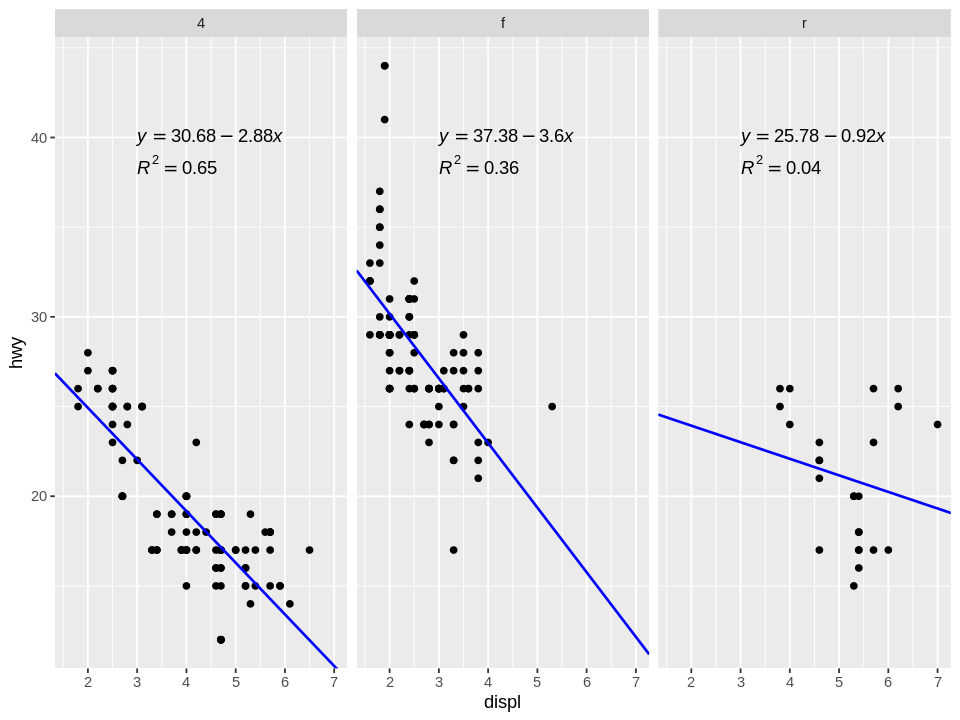

In [13]:
ggplot(
  group_modify(
    group_by(mpg, drv),
    function(df, ...) {
      model <- lm(hwy ~ displ, df)
      intercept <- coef(model)[[1]]
      slope <- coef(model)[[2]]
      as_tibble_row(
        list(
          intercept = intercept,
          lm = str_interp("italic(y) == $[.2f]{intercept} $[+.2f]{slope} * italic(x)"),
          r2 = str_interp("italic(R^2) == $[.2f]{cor(df$displ, df$hwy)^2}"),
          slope = slope
        )
      )
    }
  )
) +
  geom_point(aes(displ, hwy), mpg) +
  geom_abline(aes(intercept = intercept, slope = slope), color = "blue", size = .75) +
  geom_text(aes(label = lm), hjust = 0, parse = TRUE, x = 3, y = 40) +
  geom_text(aes(label = r2), hjust = 0, parse = TRUE, x = 3, y = 38.5) +
  facet_wrap(~drv)